Informática - 1º de Física
<br>
**Introducción a la Programación**
<br>
<p style="color:#808080"> <small><small>
5/11/2018
</small></small></p>

## Definiciones Recursivas

[recu]: https://en.wikipedia.org/wiki/Recursion_(computer_science)

En informática se dice que una función es [recursiva][recu] cuando ella misma aparece en su propia definición. Para que no se produzca un círculo vicioso que meta al programa en un bucle infinito debe exisitir un **caso base** no recursivo. Muchas funciones matemáticas y procesos computacionales se expresan de forma natural de esta forma.

### Factorial

El ejemplo obligatorio es la función factorial: $n!=1\times 2  \times 3 \times \ldots \times n$. Sabemos definirla de forma "iterativa" con un bucle, pero también podemos transcribir directamente la definición matemática recursiva:

$$ n ! = \begin{cases}
            1   & \text{si } n=0 \\
            n\, (n-1)!   & \text{si } n \geq 0 \\
         \end{cases} $$


In [1]:
def fact(n):
    if n == 0:
        return 1
    else:
        return n*fact(n-1)

fact(5), fact(8)

(120, 40320)

El proceso que realiza el ordenador es más o menos el siguiente:

    fact(5) = 
    = 5 * fact(4) =
    = 5 * 4 * fact(3) =
    = 5 * 4 * 3 * fact(2) = 
    = 5 * 4 * 3 * 2 * fact(1) = 
    = 5 * 4 * 3 * 2 * 1 * fact(0) = 
    = 5 * 4 * 3 * 2 * 1 * 1 =
    = 5 * 4 * 3 * 2 * 1 =
    = 5 * 4 * 3 * 2 =
    = 5 * 4 * 6 =
    = 5 * 24 =
    = 120

Todos los cálculos intermedios y operaciones que quedan pendientes se realizan de forma automática.

Pero hay que tener cuidado con el número que pasamos como argumento: si es negativo o no es entero la función nunca llegará al caso base y se meterá en un bucle infinito. Una buena práctica es comprobar que los argumentos a una función son válidos. Para ello es útil la sentencia `assert`.

In [2]:
def fact(n):
    assert type(n) == int, "fact requiere un argumento entero"
    assert n>=0,           "fact requiere un argumento no negativo"
    if n > 0:
        return n*fact(n-1)     
    return 1

fact(5)  # prueba argumentos ilegales como -3 o 2.6

120

Existe una forma alternativa de expresar condiciones `if-else` como un operador:

In [3]:
3 * (5 if 2>3 else 7) + 2

23

Esta sintaxis, unida a las funciones anónimas, que no necesitan `return`, permite una definición muy compacta del factorial.

In [4]:
fact = lambda n: n*fact(n-1) if n>0 else 1

fact(5)

120

### Fibonacci

La [sucesión de Fibonacci](https://en.wikipedia.org/wiki/Fibonacci_number) tiene gran interés ya que aparece en los sitios más inesperados. Se define así:


$$\begin{aligned}
F_0 &= 0\\
F_1 &= 1 \\
F_n &= F_{n-1} + F_{n-2}
\end{aligned}$$

Cada término es la suma de los dos anteriores: $0,1,1,2,3,5,8,13,21,...$ 

La definición informática es inmediata:

In [5]:
def fibo(n):
    if n==0:
        return 0
    if n==1:
        return 1
    return fibo(n-1) + fibo(n-2)

fibo(6)

8

Desafortunadamente, la doble recursión de esta función la hace muy ineficiente, ya que se repiten muchos cálculos.

In [6]:
%%time

fibo(30)

CPU times: user 776 ms, sys: 0 ns, total: 776 ms
Wall time: 784 ms


832040

En este caso se realizan del orden de $2^{28}$ llamadas recursivas. Esto puede comprobarse añadiendo un contador (o, mucho mejor, ejecutando la función en una celda con el comando mágico `%%prun`).

In [7]:
def fibo(n):
    global tot
    if n==0:
        return 0
    if n==1:
        return 1
    tot += 2
    return fibo(n-1) + fibo(n-2)

tot=0

fibo(30),tot

(832040, 2692536)

Este rendimiento tan pobre es inaceptable en cualquier aplicación realista. Hay varias alternativas: una es programar la función de forma iterativa, usando dos variables que contienen los dos últimos elementos de la secuencia calculados hasta ese momento. Es un ejercicio muy recomendable. Esta idea se puede escribir también de forma recursiva, como se muestra en el [ejercicio resuelto FG](ejercicios.ipynb#FG).

Otra posibilidad es usar un "decorador" de Python que añade automáticamente a cualquier función una memoria de los resultados que ya ha calculado ([memoization](https://en.wikipedia.org/wiki/Memoization)).

In [8]:
from functools import lru_cache

@lru_cache()
def fibo(n):
    if n==0:
        return 0
    if n==1:
        return 1
    return fibo(n-1) + fibo(n-2)

In [9]:
%%time

fibo(50)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 628 µs


12586269025

### Bisección

El método de la bisección es una forma recursiva de resolver una ecuación de la forma $h(x)=0$, partiendo el intervalo de búsqueda por la mitad y buscando en el trozo donde la función cambia de signo. Terminamos cuando el intervalo es menor que la precisión deseada.

La definición admite como parámetro la función que constituye la ecuación, además de los extremos del intervalo de búsqueda y la precisión.

In [10]:
def bisección(h,a,b,eps):
    c = (a+b)/2
    d = b-a
    if d < eps:
        return c
    if h(a)*h(c)<0:
        return bisección(h,a,c,eps)
    else:
        return bisección(h,c,b,eps)

Como ejemplo, resolvamos la ecuación de Kepler 

$$x - b \sin(x)=a$$

para $b=0.3$ y $a=0.4$.

A ojo se ve que la solución es algo menor de 0.6

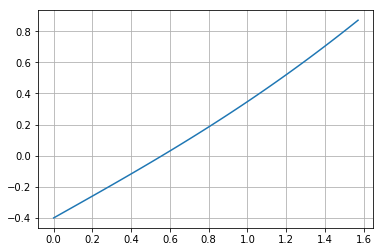

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


b = 0.3
a = 0.4

def f(x):
    return x-b*np.sin(x)-a

x = np.linspace(0,np.pi/2,100)

plt.plot(x,f(x)); plt.grid();

In [12]:
bisección(f,0,np.pi/2,1E-8)

0.5591362575837343

Otro ejemplo: encuentra una solución de $\cos(x)=x^2$.

In [13]:
from math import cos

bisección(lambda x: cos(x)-x**2, 0,3, 1e-8)

0.8241323148831725

Este método es mucho más eficiente que recorrer todo el intervalo de búsqueda discretizado con la precisión deseada para buscar el valor que produce el resultado más próximo a cero. En cada paso el error se divide por la mitad.

### Árbol

Muchas estructuras naturales tienen una configuración repetitiva, "autosimilar". Podemos recrearlas informáticamente con programas recursivos.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Por ejemplo, para crear una estructura ramificada parecida a un árbol hacemos lo siguiente: una rama se reduce a una hoja en el caso base, o se desarrolla como un tronco y dos ramas. La única complicación es calcular los puntos de partida y llegada de las subramas.

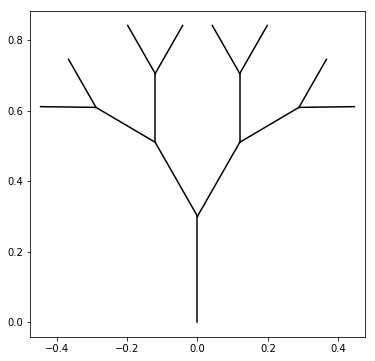

In [15]:
def rama(P,Q,n):
    x1,y1 = P
    x2,y2 = Q
    if n>0:
        dx,dy = D = Q-P
        M = xm,ym = P + 0.3*D
        plt.plot([x1,xm],[y1,ym],'black')
        R = 0.4*np.array([dy,-dx])
        rama(M,Q+R,n-1)
        rama(M,Q-R,n-1)
        
plt.figure(figsize=(6,6))        
rama(np.array([0,0]),[0,1],4)
plt.axis('equal');

El aspecto final depende de las longitudes y ángulos de la "Y" en que se transforma cada segmento.

Podemos adornarlo un poco:

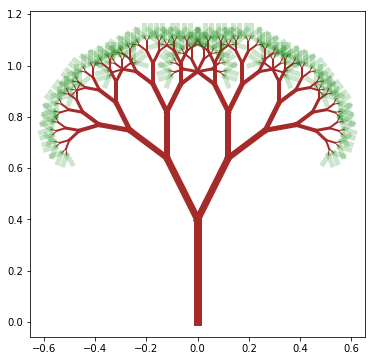

In [16]:
def rama(P,Q,n):
    x1,y1 = P
    x2,y2 = Q
    if n<=0:
        plt.plot([x1,x2],[y1,y2],'green',lw=5,alpha=0.2)
    else:
        dx,dy = D = Q-P
        M = xm,ym = P + 0.4*D
        plt.plot([x1,xm],[y1,ym],'brown',lw=n)
        R = 0.3*np.array([dy,-dx])
        rama(M,Q+R,n-1)
        rama(M,Q-R,n-1)
        

plt.figure(figsize=(6,6))        
rama(np.array([0,0]),[0,1],8)
plt.axis('equal');

De nuevo se trata de una doble recursión, por lo que el tiempo de cálculo crece de forma exponencial con el nivel de detalle.

Añadiendo perturbaciones aleatorias se puede conseguir un aspecto más natural. Intenta conseguir algo parecido a esto:

![tree](graph/tree.png)

Hay muchos otros objetos recursivos que se pueden programar fácilmente. Como ejercicio puedes dibujar un [copo de nieve de Koch](https://en.wikipedia.org/wiki/Koch_snowflake). 


### Programación dinámica *

En computación, el término "[programación dinámica](https://en.wikipedia.org/wiki/Dynamic_programming)" se refiere a los métodos de solución recursivos con *memoization* de resultados. 

Ya hemos visto un ejemplo muy sencillo de esto en la sucesión de Fibonacci. Aunque la solución recursiva directa tiene complejidad exponencial, simplemente almacenando en una tabla los elementos ya calculados el coste se vuelve lineal.

Otro ejemplo interesante es el del "problema del cambio" que aparece en el [libro de Sannemo](https://www.csc.kth.se/~jsannemo/slask/main.pdf). Se trata de expresar una cantidad con el menor número de monedas de valores dados. Si los valores son, por ejemplo {1,2,5,10}, un método óptimo es ir reduciendo la cantidad siempre con la moneda de mayor valor posible: P. ej.: 19=10+5+2+2.

Pero si los valores posibles son D={1,6,7}, entonces esta estrategia falla: 12=7+1+1+1+1+1 es mucho peor que 12=6+6.

Para resolver el problema en este tipo de casos es necesario calcular el coste que supone usar cada moneda, resolviendo el problema para la candidad restante, y elegir la mejor. Esto implica consultar la solución de muchos subproblemas, lo que daría lugar a un coste exponencial a menos que se vayan almacenando en algún tipo de tabla. Como hemos visto, Python permite añadir memoization cómodamente a las funciones.

In [1]:
D = [1,6,7]

# change devuelve el número de monedas y una lista con las monedas utilizadas
def change(t):
    if t==0:
        return 0, []
    # probamos a reducir el problema con todas las monedas
    pos = [ (change(t-d),d) for d in D if t>=d ]
    # elegimos la de menor tamaño
    (n,l),s = min(pos)
    # formamos la solución completa con la moneda elegida
    return 1+n, l+[s]

In [2]:
change(50)

(8, [1, 7, 7, 7, 7, 7, 7, 7])

Repetimos exactamente la misma definición, añadiendo memoization.

In [3]:
from functools import lru_cache

D = [1,6,7]

@lru_cache(maxsize=None)
def change(t):
    if t==0:
        return 0, []
    pos = [ (change(t-d),d) for d in D if t>=d ]
    (n,l),s = min(pos)
    return 1+n, l+[s]

In [4]:
change(100)

(15, [6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])